![image](https://user-images.githubusercontent.com/71218142/194534926-54832efd-09d8-4b8b-94fa-75154050b05b.png)


![image](https://user-images.githubusercontent.com/71218142/194535811-32249724-40d7-47b6-8290-0151cf9a014c.png)

![image](https://user-images.githubusercontent.com/71218142/194535872-c4051ca2-849f-4d63-8f98-c93e4500fb73.png)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# min_df = 1 어떤 단어도 무시하지마!
# 단어들의 카운트(출현 빈도(frequency))로 여러 문서들을 벡터화
vectorizer = CountVectorizer(min_df = 1)


In [4]:
%%time

# 크기가 5인 문서
contents = [
    '상처받은 아이들은 너무 일찍 커버려', 
    '내가 상처받은 거 아는 사람 불편해', 
    '잘 사는 사람들은 좋은 사람 되기 쉬워', 
    '아무 일도 아니야 괜찮아'
]

CPU times: total: 0 ns
Wall time: 0 ns


In [5]:
# 형태소 분석 엔진 Okt(= Open Korean Text)
# 한글은 형태소 분석이 필수이다.
from konlpy.tag import Okt 

t = Okt()

In [6]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

# 형태소를 기준으로 문서의 문장들이 나뉜 모습. Okt.morphs()가 토크나이저, 형태소 기준으로 토큰화

[['상처', '받은', '아이', '들', '은', '너무', '일찍', '커버', '려'],
 ['내', '가', '상처', '받은', '거', '아는', '사람', '불편해'],
 ['잘', '사는', '사람', '들', '은', '좋은', '사람', '되기', '쉬워'],
 ['아무', '일도', '아니야', '괜찮아']]

In [7]:
# 문서들을 벡터화 시킨다. 형태소 분석된 결과를 다시 하나의 문장으로 합친다.(논란의 여지가 있는 전처리)
contents_for_vectorize = []

for content in contents_tokens : 
    sentence = ''
    for word in content : 
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

# NLTK를 사용할건데 NLTK가 한 문장이 들어오는게 좋고, nltk.CounterVectorize가 띄어쓰기로 구분되기 때문에 띄어쓰기함

[' 상처 받은 아이 들 은 너무 일찍 커버 려',
 ' 내 가 상처 받은 거 아는 사람 불편해',
 ' 잘 사는 사람 들 은 좋은 사람 되기 쉬워',
 ' 아무 일도 아니야 괜찮아']

In [10]:
# 벡터라이즈 수행
# 네 개의 문장에 전체 말뭉치 단어가 17개 였어요. 
# 훈련 ㄱㄱ 

X = vectorizer.fit_transform(contents_for_vectorize)
X

<4x17 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [11]:
num_samples, num_features = X.shape 
num_samples, num_features

# 4 컴마 17, 17은 전체 말뭉치가 17개

(4, 17)

In [15]:
# get_feature_names() 로 벡터라이저 된 말뭉치를 볼 수 있음

vectorizer.get_feature_names()

C:\Users\ck12q\anaconda3\envs\ds_study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['괜찮아',
 '너무',
 '되기',
 '받은',
 '불편해',
 '사는',
 '사람',
 '상처',
 '쉬워',
 '아는',
 '아니야',
 '아무',
 '아이',
 '일도',
 '일찍',
 '좋은',
 '커버']

In [14]:
# 17개의 형태소로 4개의 문장이 완성돼요
len(vectorizer.get_feature_names_out())

17

In [18]:
'''
[' 상처 받은 아이 들 은 너무 일찍 커버 려',
 ' 내 가 상처 받은 거 아는 사람 불편해',
 ' 잘 사는 사람 들 은 좋은 사람 되기 쉬워',
 ' 아무 일도 아니야 괜찮아']
'''

'''
형태소 말뭉치 단어 17개
['괜찮아',
 '너무',
 '되기',
 '받은',
 '불편해',
 '사는',
 '사람',
 '상처',
 '쉬워',
 '아는',
 '아니야',
 '아무',
 '아이',
 '일도',
 '일찍',
 '좋은',
 '커버']
'''

# X.toarray().transpose()

X.toarray()

array([[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]], dtype=int64)

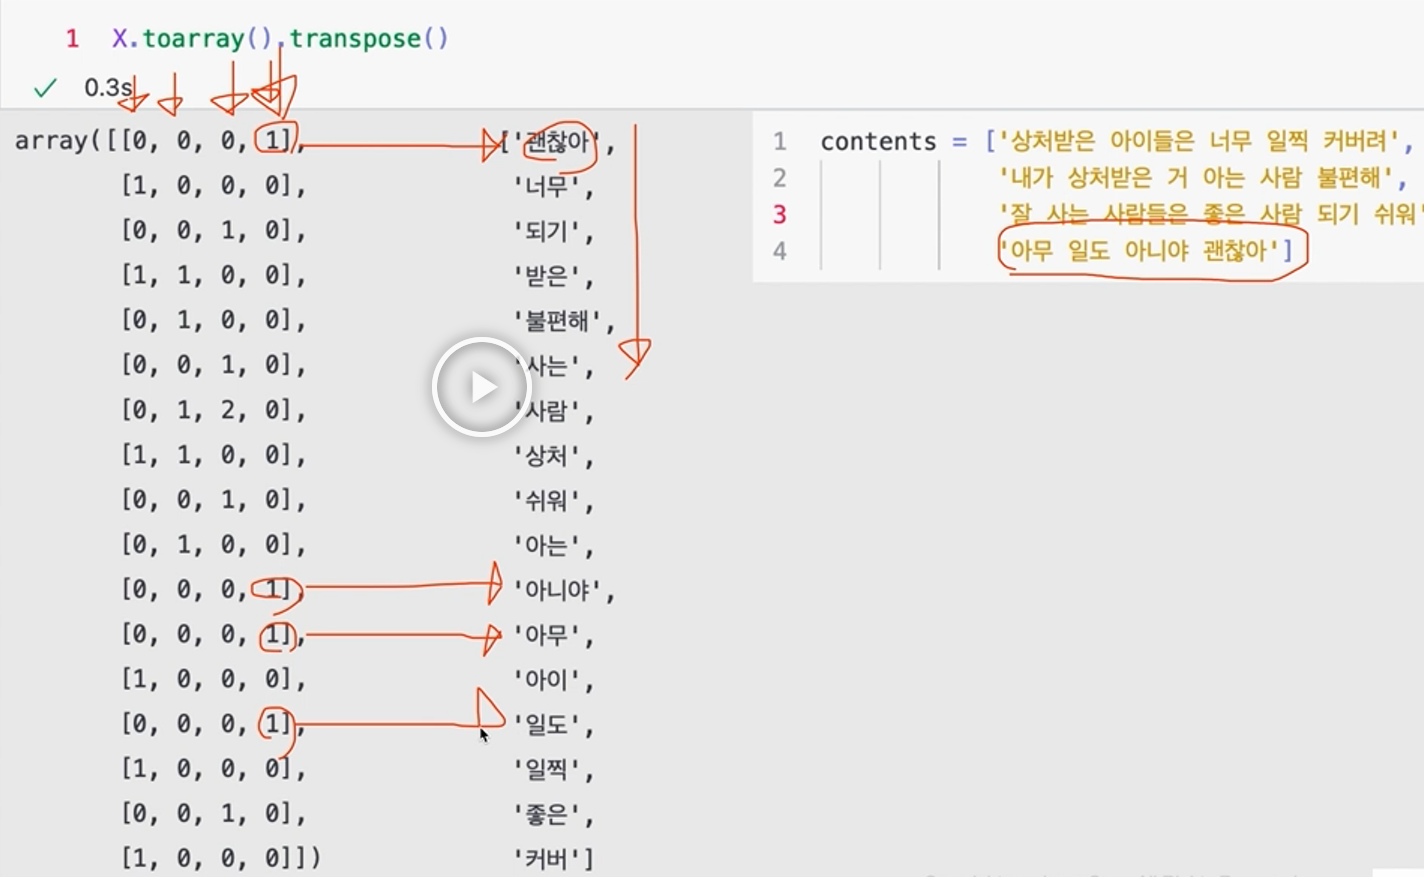

In [16]:
test = ['상처받기 싫어 괜찮아']
test_tokens = [t.morphs(row) for row in test]
test_tokens

[['상처', '받기', '싫어', '괜찮아']]

In [19]:
test_for_vectorize = []

for content in test_tokens : 
    sentence = ''
    for word in content : 
        sentence = sentence + ' ' + word 
        
    test_for_vectorize.append(sentence)
    
test_for_vectorize

[' 상처 받기 싫어 괜찮아']

In [21]:
test_vector =  vectorizer.transform(test_for_vectorize)
test_vector

<1x17 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [23]:
vectorizer.get_feature_names_out()

array(['괜찮아', '너무', '되기', '받은', '불편해', '사는', '사람', '상처', '쉬워', '아는',
       '아니야', '아무', '아이', '일도', '일찍', '좋은', '커버'], dtype=object)

In [22]:
test_vector.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [24]:
# 이제 벡터를 만들었으니 거리를 구해야 하겠지??! 

import scipy as sp 

In [25]:
# 기하학을 이용한 거리를 사용해보자

def dist_raw(v1, v2) : 
    delta = v1 - v2 
    return sp.linalg.norm(delta.toarray())

In [28]:
dist = [dist_raw(each, test_vector) for each in X]

print('Best post is ', dist.index(min(dist)), ', dist = ', min(dist))

TypeError: '<' not supported between instances of 'function' and 'function'

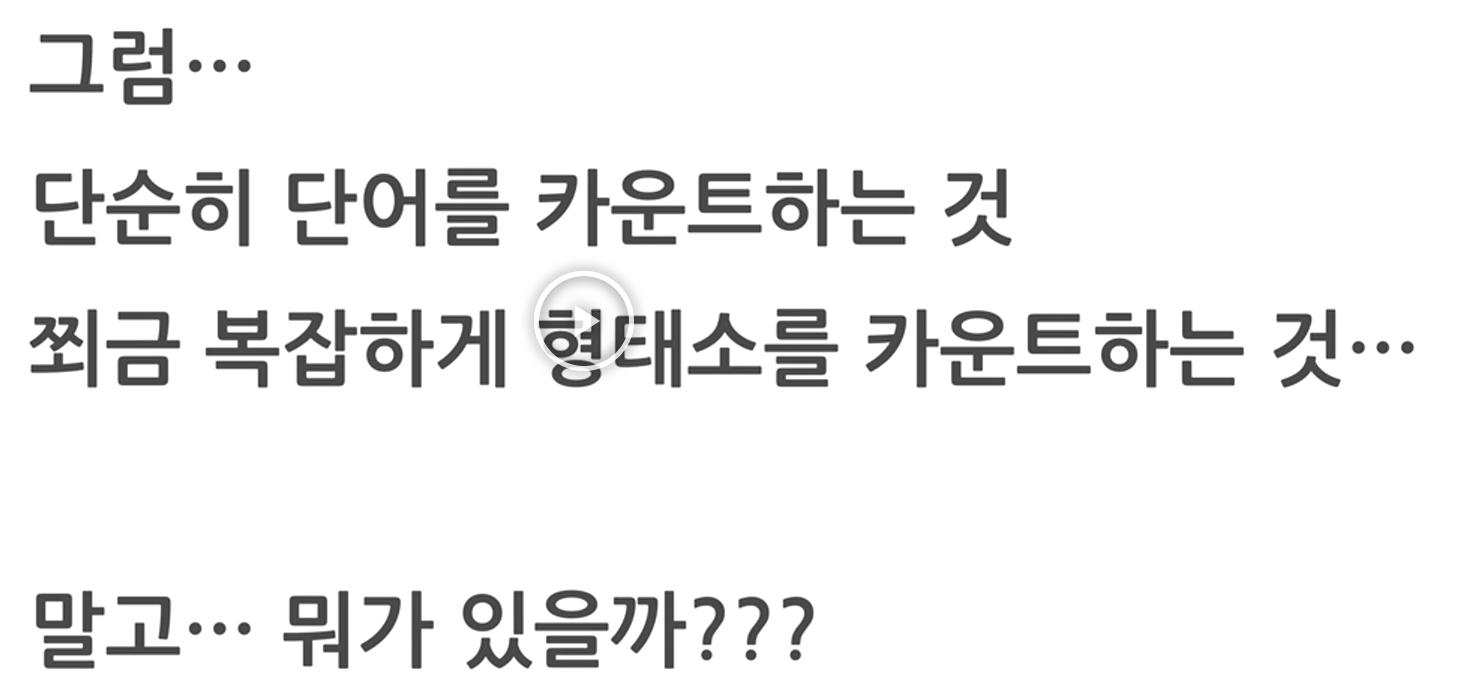

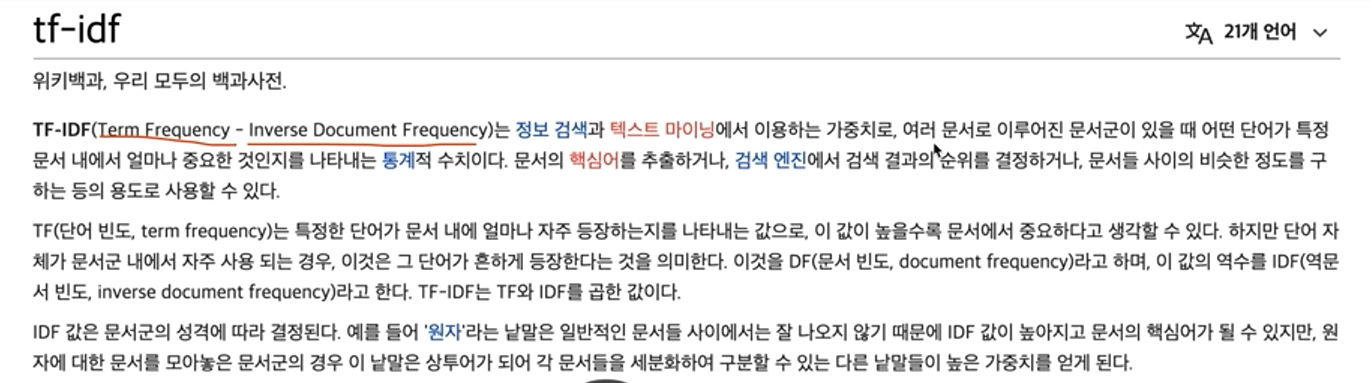

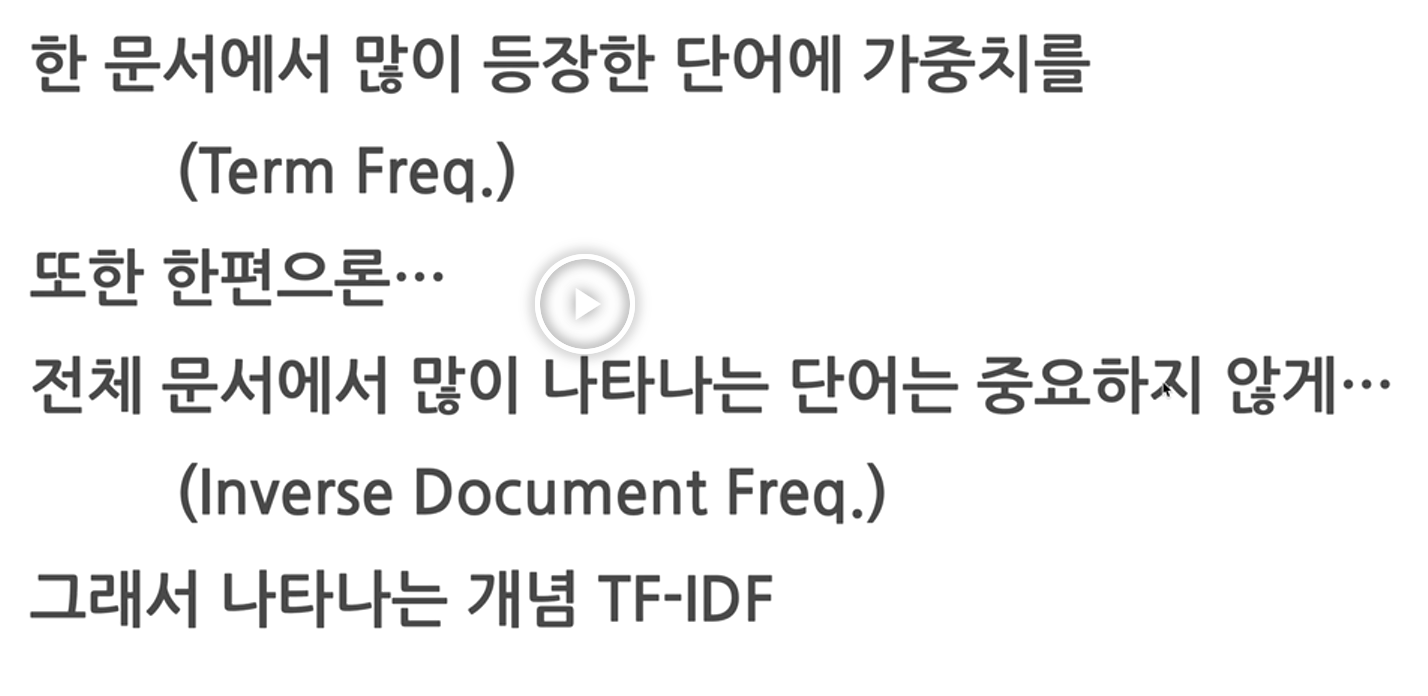

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# decode 에러 무시?!
vectorizer = TfidfVectorizer(min_df= 1, decode_error= 'ignore')

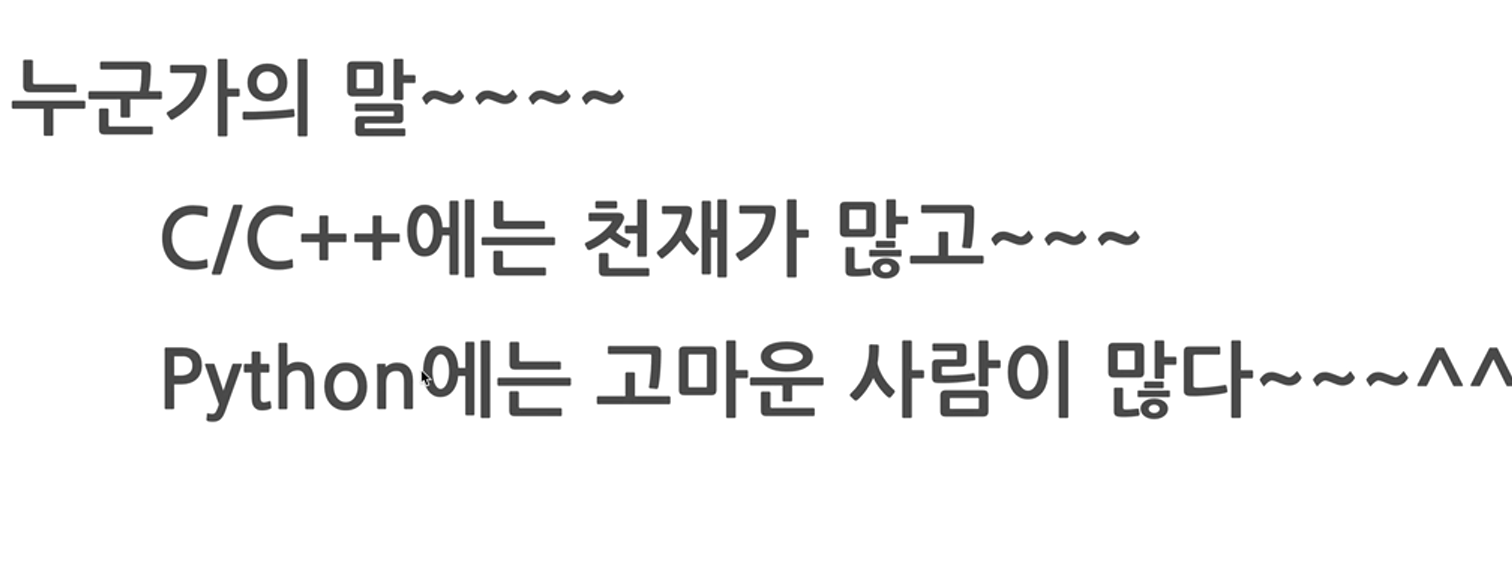

In [32]:
# tf-idf 기반의 훈련, 토크나이저 생성 토큰 : 한 문장의 시퀀스를 나누는 것
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape 
num_samples, num_features

(4, 17)

In [34]:
vectorizer.get_feature_names_out()

array(['괜찮아', '너무', '되기', '받은', '불편해', '사는', '사람', '상처', '쉬워', '아는',
       '아니야', '아무', '아이', '일도', '일찍', '좋은', '커버'], dtype=object)

In [38]:
# 가중치, 역 가중치 반영
X.toarray().transpose()

array([[0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.40104275, 0.6191303 , 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.43671931, 0.        , 0.        , 0.        ]])

In [41]:
# [' 상처 받기 싫어 괜찮아']

test_vector =  vectorizer.transform(test_for_vectorize)
test_vector.toarray().transpose()

array([[0.78528828],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.6191303 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [44]:
def dist_norm(v1, v2) : 
    v1_nomalized = v1 / sp.linalg.norm(v1.toarray())
    print(v1_nomalized)
    v2_nomalized = v2 / sp.linalg.norm(v2.toarray())
    print(v2_nomalized)
    
    
    delta = v1_nomalized - v2_nomalized
    return sp.linalg.norm(delta.toarray())

In [46]:
dist = [dist_norm(each, test_vector) for each in X]
print('')
dist

  (0, 16)	0.43671930987511215
  (0, 14)	0.43671930987511215
  (0, 1)	0.43671930987511215
  (0, 12)	0.43671930987511215
  (0, 3)	0.3443145201184689
  (0, 7)	0.3443145201184689
  (0, 7)	0.6191302964899972
  (0, 0)	0.7852882757103967
  (0, 4)	0.5086718718935653
  (0, 6)	0.4010427464699961
  (0, 9)	0.5086718718935653
  (0, 3)	0.4010427464699961
  (0, 7)	0.4010427464699961
  (0, 7)	0.6191302964899972
  (0, 0)	0.7852882757103967
  (0, 8)	0.39264413785519836
  (0, 2)	0.39264413785519836
  (0, 15)	0.39264413785519836
  (0, 5)	0.39264413785519836
  (0, 6)	0.6191302964899972
  (0, 7)	0.6191302964899972
  (0, 0)	0.7852882757103967
  (0, 0)	0.5
  (0, 10)	0.5
  (0, 13)	0.5
  (0, 11)	0.5
  (0, 7)	0.6191302964899972
  (0, 0)	0.7852882757103967



[1.254451632446019, 1.2261339938790283, 1.4142135623730951, 1.1021396119773588]

In [47]:
print('Best post is', dist.index(min(dist)), ', dist = ', min(dist))
print('Test post is --> ', test_for_vectorize)
print('Best dist post is --> ', contents[dist.index(min(dist))])

# td-idf을 이용하여 벡터화 한 결과 [' 상처 받기 싫어 괜찮아']와 가장 유사한 문장은 알무 일도 아니야 괜찮아

Best post is 3 , dist =  1.1021396119773588
Test post is -->  [' 상처 받기 싫어 괜찮아']
Best dist post is -->  아무 일도 아니야 괜찮아


In [51]:
a = np.array([1, 1, 1, 1, 0])
a

array([1, 1, 1, 1, 0])

In [49]:
from numpy.linalg import norm 

In [50]:
norm(a)

2.0

In [60]:
# 강의 검색 엔진을 만들었다고 생각해라 
import urllib 
import json 
import datetime

In [62]:
def gen_search_url(api_node, search_text, start_num, disp_num) : 
    
    base = 'https://openapi.naver.com/v1/search'
    node = '/' + api_node + '.json'
    param_query = '?query=' + urllib.parse.quote(search_text)
    param_start = '&start=' + str(start_num)
    param_disp = '&display=' + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [64]:
def get_result_onpage(url) : 
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",'vLGyuzGhyXYpgBlMhiah')
    request.add_header("X-Naver-Client-Secret",'YQZHZuhDII')
    response = urllib.request.urlopen(request)
    
    print('[%s] Url Request Success' % datetime.datetime.now())
    
    return json.loads(response.read().decode('utf-8'))

In [66]:
url = gen_search_url('kin', '파이썬', 1, 100)
one_result = get_result_onpage(url)
one_result

[2022-10-07 22:16:38.702751] Url Request Success


{'lastBuildDate': 'Fri, 07 Oct 2022 22:16:38 +0900',
 'total': 243056,
 'start': 1,
 'display': 100,
 'items': [{'title': '<b>파이썬</b> 케이크 도와주세요 퓨ㅠ',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=426155555&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
   'description': '이건 <b>파이썬</b> 인가요? <b>파이썬</b> 아니면 <b>파이썬</b> 코드로 생일 케이크 해주려해서 생일 날짜... <b>파이썬</b>이에요. class HBD: def __init__(self, date): self.date = date def Birthday(self, name): print(f&quot;Happy... '},
  {'title': '<b>파이썬</b> 질문',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=104&docId=429713607&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0',
   'description': '안녕하세요 <b>파이썬</b> 왕초보입니다. <b>파이썬</b>에서 특정 줄로 돌아가려면 어떻게 해야 하나요? 특정 코드 줄 로... <b>파이썬</b>에서 기본적로 goto 문은 없습니다. <b>파이썬</b>에서 if-else나 반복문(for, while) 또는예외처리 등으로 코딩해야... '},
  {'title': '<b>파이썬</b> 책 추천해주세요!',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=42

In [68]:
one_result['items'][0]['description']

'이건 <b>파이썬</b> 인가요? <b>파이썬</b> 아니면 <b>파이썬</b> 코드로 생일 케이크 해주려해서 생일 날짜... <b>파이썬</b>이에요. class HBD: def __init__(self, date): self.date = date def Birthday(self, name): print(f&quot;Happy... '

In [69]:
def delete_tag(input_str) : 
    input_str = input_str.replace('<b>', '')
    input_str = input_str.replace('</b>', '')
    return input_str

In [71]:
def get_description(pages) : 
    contents = []
    
    for sentence in pages['items'] : 
        contents.append(delete_tag(sentence['description']))
        
    return contents

In [72]:
contents = get_description(one_result)
contents

['이건 파이썬 인가요? 파이썬 아니면 파이썬 코드로 생일 케이크 해주려해서 생일 날짜... 파이썬이에요. class HBD: def __init__(self, date): self.date = date def Birthday(self, name): print(f&quot;Happy... ',
 '안녕하세요 파이썬 왕초보입니다. 파이썬에서 특정 줄로 돌아가려면 어떻게 해야 하나요? 특정 코드 줄 로... 파이썬에서 기본적로 goto 문은 없습니다. 파이썬에서 if-else나 반복문(for, while) 또는예외처리 등으로 코딩해야... ',
 '파이썬 독학하려고 하는데 입문용으로 추천해주세요. 추천하시는 이유까지 써주시면 좋겠습니다! 이 책은 파이썬이... 노력하였으며, 파이썬이란 언어의 개별적인 특성만을 강조하지 않고 프로그래밍 전반에 관한 사항을 파이썬이란... ',
 '... 회사에서 파이썬으로 개발을 해야하는 상황이라 파이썬을 학습하고 있습니다.. 그냥 참고 3년 파이썬 배우고 3년... 일단 파이썬 개발자로 일하시면서 스스로의 성장과 성과에 대해 꾸준히 생각해 보시고 그 양상에 따라 결정하시는... ',
 '파이썬 어떻게하나요ㅠㅠ sec = int(input(&quot;자정부터 경과 시간을 초 단위로 입력 : &quot;)) hour = sec // 3600 sec = sec % 3600 min = sec // 60 sec = sec % 60 print(&quot;현재 시각 = {}시 {}분 {}초&quot;.format(hour, min, sec)) ',
 '친구가 파이썬 어쩌고저쩌고 해서 카톡으로 ip털고 비번 턴다고 협박하는데... 파이썬으로 만든 프로그램을 실행시키게 하면 링크접속으로 리다이렉트... 파이썬은 프로그램을 개발하기 위한 언어입니다. 창의력만 있다면 어떤방식이든... ',
 '파이썬 이거 어떻게 하나요ㅠ? second = int(input(&quot;자정부터 경과 시간을 초 단위로 입력 : &quot;)) sec = 24 * 60 

In [74]:
len(contents)

100

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt 

t = Okt()
vectorizer = CountVectorizer(min_df = 1)

In [75]:
# 형태소 기준으로 토크나이저를 만들기 위해 morphs 전처리
contents_tokens = [t.morphs(row) for row in contents]
# 영어는 어떻게 처리해?
contents_tokens

[['이건',
  '파이썬',
  '인가요',
  '?',
  '파이썬',
  '아니면',
  '파이썬',
  '코드',
  '로',
  '생일',
  '케이크',
  '해주려',
  '해서',
  '생일',
  '날짜',
  '...',
  '파이썬',
  '이에요',
  '.',
  'class',
  'HBD',
  ':',
  'def',
  '__',
  'init',
  '__(',
  'self',
  ',',
  'date',
  '):',
  'self.date',
  '=',
  'date',
  'def',
  'Birthday',
  '(',
  'self',
  ',',
  'name',
  '):',
  'print',
  '(',
  'f',
  '&',
  'quot',
  ';',
  'Happy',
  '...'],
 ['안녕하세요',
  '파이썬',
  '왕초',
  '보입니다',
  '.',
  '파이썬',
  '에서',
  '특정',
  '줄',
  '로',
  '돌아가려면',
  '어떻게',
  '해야',
  '하나요',
  '?',
  '특정',
  '코드',
  '줄',
  '로',
  '...',
  '파이썬',
  '에서',
  '기본',
  '적',
  '로',
  'goto',
  '문',
  '은',
  '없습니다',
  '.',
  '파이썬',
  '에서',
  'if',
  '-',
  'else',
  '나',
  '반복',
  '문',
  '(',
  'for',
  ',',
  'while',
  ')',
  '또는',
  '예외처리',
  '등',
  '으로',
  '코딩',
  '해야',
  '...'],
 ['파이썬',
  '독학',
  '하려고',
  '하는데',
  '입문',
  '용',
  '으로',
  '추천',
  '해주세요',
  '.',
  '추천',
  '하시는',
  '이유',
  '까지',
  '써주시면',
  '좋겠습니다',
  '!',
  '이',
  '책',
  '은',


In [77]:
len(contents_tokens[0])

48

In [79]:
contents_for_vectorize = [] 

for content in contents_tokens : 
    sentence = ''
    
    for word in content : 
        sentence = sentence + ' ' + word 
        
    contents_for_vectorize.append(sentence)
    
print(contents_for_vectorize)

[' 이건 파이썬 인가요 ? 파이썬 아니면 파이썬 코드 로 생일 케이크 해주려 해서 생일 날짜 ... 파이썬 이에요 . class HBD : def __ init __( self , date ): self.date = date def Birthday ( self , name ): print ( f & quot ; Happy ...', ' 안녕하세요 파이썬 왕초 보입니다 . 파이썬 에서 특정 줄 로 돌아가려면 어떻게 해야 하나요 ? 특정 코드 줄 로 ... 파이썬 에서 기본 적 로 goto 문 은 없습니다 . 파이썬 에서 if - else 나 반복 문 ( for , while ) 또는 예외처리 등 으로 코딩 해야 ...', ' 파이썬 독학 하려고 하는데 입문 용 으로 추천 해주세요 . 추천 하시는 이유 까지 써주시면 좋겠습니다 ! 이 책 은 파이썬 이 ... 노력 하였으며 , 파이썬 이란 언어 의 개별 적 인 특성 만을 강조 하지 않고 프로그래밍 전반 에 관 한 사항 을 파이썬 이란 ...', ' ... 회사 에서 파이썬 으로 개발 을 해야하는 상황 이라 파이썬 을 학습 하고 있습니다 .. 그냥 참고 3년 파이썬 배우고 3년 ... 일단 파이썬 개발자 로 일 하시면서 스스로 의 성장 과 성과 에 대해 꾸준히 생각 해 보시 고 그 양상 에 따라 결정 하시는 ...', ' 파이썬 어떻게 하나요 ㅠㅠ sec = int ( input (& quot ; 자정 부터 경과 시간 을 초 단위 로 입력 : & quot ;)) hour = sec // 3600 sec = sec % 3600 min = sec // 60 sec = sec % 60 print (& quot ; 현재 시각 = {} 시 {} 분 {} 초 & quot ;. format ( hour , min , sec ))', ' 친구 가 파이썬 어쩌고저쩌고 해서 카톡 으로 ip 털고 비번 턴다 고 협박 하는데 ... 파이썬 으로 만든 프로그램 을 실행 시키게 하면 링크 접속 으로 리다이렉트 ... 파이썬 은 프로그램 을

In [82]:
# 문서 안 문장들을 형태소로 나눠 리스트로 만들고 다시 문자열로 만듦
contents_for_vectorize[0]

' 이건 파이썬 인가요 ? 파이썬 아니면 파이썬 코드 로 생일 케이크 해주려 해서 생일 날짜 ... 파이썬 이에요 . class HBD : def __ init __( self , date ): self.date = date def Birthday ( self , name ): print ( f & quot ; Happy ...'

In [83]:
# 훈련 데이터를 기반으로 각 단어에 가중치를 주는 과정을 진행
X = vectorizer.fit_transform(contents_for_vectorize)
X

<100x1180 sparse matrix of type '<class 'numpy.int64'>'
	with 2294 stored elements in Compressed Sparse Row format>

In [84]:
# 100 * 1180
num_samples, num_features = X.shape
num_samples, num_features

(100, 1180)

In [87]:
X.toarray()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
new_post = ['파이썬 존나 어렵네 진짜']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = [] 

for content in new_post_tokens : 
    sentence = ''
    for word in content : 
        sentence = sentence + ' ' + word 
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 파이썬 존나 어렵네 진짜']

In [97]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [98]:
def dist_norm(v1, v2) : 
    v1_nomalized = v1 / sp.linalg.norm(v1.toarray())
    print(v1_nomalized)
    v2_nomalized = v2 / sp.linalg.norm(v2.toarray())
    print(v2_nomalized)
    
    
    delta = v1_nomalized - v2_nomalized
    return sp.linalg.norm(delta.toarray())

In [103]:
X

<100x1180 sparse matrix of type '<class 'numpy.int64'>'
	with 2294 stored elements in Compressed Sparse Row format>

In [99]:
# 기하학을 이용한 거리를 사용해보자
import scipy as sp

def dist_raw(v1, v2) : 
    delta = v1 - v2 
    
    return sp.linalg.norm(delta.toarray())

In [100]:
dist = [dist_norm(each, new_post_vec) for each in X]
dist

  (0, 24)	0.2519763153394848
  (0, 31)	0.1259881576697424
  (0, 35)	0.1259881576697424
  (0, 47)	0.3779644730092272
  (0, 49)	0.2519763153394848
  (0, 73)	0.1259881576697424
  (0, 74)	0.1259881576697424
  (0, 85)	0.1259881576697424
  (0, 115)	0.1259881576697424
  (0, 130)	0.1259881576697424
  (0, 137)	0.1259881576697424
  (0, 151)	0.3779644730092272
  (0, 338)	0.1259881576697424
  (0, 633)	0.2519763153394848
  (0, 702)	0.1259881576697424
  (0, 824)	0.1259881576697424
  (0, 842)	0.1259881576697424
  (0, 852)	0.1259881576697424
  (0, 1024)	0.1259881576697424
  (0, 1025)	0.1259881576697424
  (0, 1044)	0.5039526306789696
  (0, 1143)	0.1259881576697424
  (0, 1150)	0.1259881576697424
  (0, 748)	0.5773502691896258
  (0, 974)	0.5773502691896258
  (0, 1044)	0.5773502691896258
  (0, 55)	0.1386750490563073
  (0, 64)	0.1386750490563073
  (0, 70)	0.1386750490563073
  (0, 81)	0.1386750490563073
  (0, 179)	0.1386750490563073
  (0, 310)	0.1386750490563073
  (0, 397)	0.1386750490563073
  (0, 446)	0.138

[1.1908340044008459,
 1.1659705762924089,
 1.1516416383349402,
 1.15164163833494,
 1.375096743826413,
 1.2247448713915892,
 1.3681008516114899,
 1.1307803908213363,
 1.2078899863810202,
 1.1445236741359464,
 1.1268111006995711,
 1.157657600901986,
 1.2225828590979382,
 1.160518304576804,
 1.2729245074626385,
 1.2203467054672419,
 1.2836742723408265,
 1.3533549481886473,
 1.2180321098007547,
 1.2131485713648702,
 1.2616464280994644,
 1.1710937788859146,
 1.2445932601449774,
 1.1382615143013055,
 1.3388837369442932,
 1.3045526447790554,
 1.1417921773147726,
 1.2105690877331834,
 1.2708657759733124,
 1.1307803908213363,
 1.3472564472258393,
 1.2590549321248181,
 1.2105690877331834,
 1.1527549370035142,
 1.3818671693295175,
 1.1927488129570176,
 1.0801234497346435,
 1.3712268710837567,
 1.3221284675327567,
 1.1484749781310002,
 1.3585641869407232,
 1.2490230802254778,
 1.1451941439515414,
 1.1484749781310002,
 1.2664679162179082,
 1.215634415493781,
 1.3300601085380126,
 1.2767928058941986

In [102]:
print(min(dist))
contents[dist.index(min(dist))]

# [' 파이썬 존나 어렵네 진짜']

1.0801234497346435


'C언어 배우고 파이썬 배우는데 파이썬 배우는게 더 어렵다고 느껴지는데 정상인가요 아마도 C언어를 먼저 배워... 지금 파이썬 배우실 때 C언어는 이렇게 하면 되는데, 파이썬은 안되네. 또는 만들기가 더 어렵네 등으로 이해하지 마시고... '